<a href="https://colab.research.google.com/github/chricannon/Predicting_popular_platforms/blob/main/Project_1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question #2:
Building a linear regression model to predict song's Track Score from Spotify's 2024 Hit Song Dataset.


Import Necessary Libraries

In [120]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle

2. Loading dataset into a Pandas dataframe

In [121]:
spotify = '/content/Most Streamed Spotify Songs 24_linear_reg_dataset.csv'
df = pd.read_csv(spotify, encoding='latin-1')

Taking a peek at the dataset.

In [122]:
df.tail(4)

,Track,Album Name,Artist,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,"4,575",19.4,52282360.0,4602.0,1449767.0,56.0,9.439202e+08,5347766.0,NaN,1721.0,19935.0,24973048.0,1.0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,"4,571",19.4,189972685.0,72066.0,6704802.0,65.0,2.010273e+08,1081402.0,7596.0,5288677.0,36849005.0,29253152.0,19.0
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,"4,591",19.4,145467020.0,14037.0,7387064.0,66.0,1.118595e+09,3868828.0,11433.0,2534831.0,37757301.0,25150516.0,1.0
4599,Me Acostumbre (feat. Bad Bunny),Me Acostumbre (feat. Bad Bunny),Arcï¿½ï¿½,"4,593",19.4,255740653.0,32138.0,14066526.0,64.0,8.663008e+08,3826829.0,78000.0,10055461.0,70196388.0,175831376.0,11.0


Converting the All Time Rank column to numeric.

In [123]:
df['All Time Rank'] = pd.to_numeric(df['All Time Rank'], errors='coerce')


In [124]:
df.dtypes

,0
Track,object
Album Name,object
Artist,object
All Time Rank,float64
Track Score,float64
Spotify Streams,float64
Spotify Playlist Count,float64
Spotify Playlist Reach,float64
Spotify Popularity,float64
YouTube Views,float64


Filling any NaN values in numeric columns with the median before generating correlation matrix.

In [125]:
print(df.columns)

Index(['Track', 'Album Name', 'Artist', 'All Time Rank', 'Track Score',
       'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count'],
      dtype='object')


In [126]:
#stripping leading/trailing spaces
df.columns = df.columns.str.strip()

In [127]:
print(df.isnull().sum())

Track                            0
Album Name                       0
Artist                           5
All Time Rank                 3596
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
dtype: int64


In [128]:
print(df.dtypes)

Track                          object
Album Name                     object
Artist                         object
All Time Rank                 float64
Track Score                   float64
Spotify Streams               float64
Spotify Playlist Count        float64
Spotify Playlist Reach        float64
Spotify Popularity            float64
YouTube Views                 float64
YouTube Likes                 float64
TikTok Posts                  float64
TikTok Likes                  float64
TikTok Views                  float64
YouTube Playlist Reach        float64
Apple Music Playlist Count    float64
dtype: object


In [129]:
#list of numeric columns with NaN values
numeric_columns_with_nan = ['All Time Rank', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count']

In [130]:
#Fill missing values with the median for these columns
df[numeric_columns_with_nan] = df[numeric_columns_with_nan].fillna(df[numeric_columns_with_nan].median())

In [131]:
print(df[numeric_columns_with_nan].isnull().sum())

All Time Rank                 0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
dtype: int64


Generating a correlation matrix

In [132]:
#Dropping columns not to be used in the correlation matrix
spotify_corr = df.drop(['Track', 'Album Name', 'Artist','Apple Music Playlist Count', 'YouTube Playlist Reach', 'YouTube Views', 'YouTube Likes'], axis=1)

In [133]:
spotify_corr.dtypes

,0
All Time Rank,float64
Track Score,float64
Spotify Streams,float64
Spotify Playlist Count,float64
Spotify Playlist Reach,float64
Spotify Popularity,float64
TikTok Posts,float64
TikTok Likes,float64
TikTok Views,float64


In [134]:
spotify_corr.corr()

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,TikTok Posts,TikTok Likes,TikTok Views
All Time Rank,1.000000,-0.526683,-0.120689,-0.090795,-0.254896,-0.055034,-0.110887,-0.051020,-0.056912
Track Score,-0.526683,1.000000,0.246756,0.188534,0.495823,0.175363,0.224358,0.094191,0.103167
Spotify Streams,-0.120689,0.246756,1.000000,0.798704,0.578808,0.309379,0.054515,0.052316,0.039799
Spotify Playlist Count,-0.090795,0.188534,0.798704,1.000000,0.611981,0.337574,0.058277,0.072311,0.058201
Spotify Playlist Reach,-0.254896,0.495823,0.578808,0.611981,1.000000,0.435188,0.009205,0.041213,0.032697
Spotify Popularity,-0.055034,0.175363,0.309379,0.337574,0.435188,1.000000,-0.121392,-0.033680,-0.043782
TikTok Posts,-0.110887,0.224358,0.054515,0.058277,0.009205,-0.121392,1.000000,0.510356,0.536970
TikTok Likes,-0.051020,0.094191,0.052316,0.072311,0.041213,-0.033680,0.510356,1.000000,0.992565
TikTok Views,-0.056912,0.103167,0.039799,0.058201,0.032697,-0.043782,0.536970,0.992565,1.000000


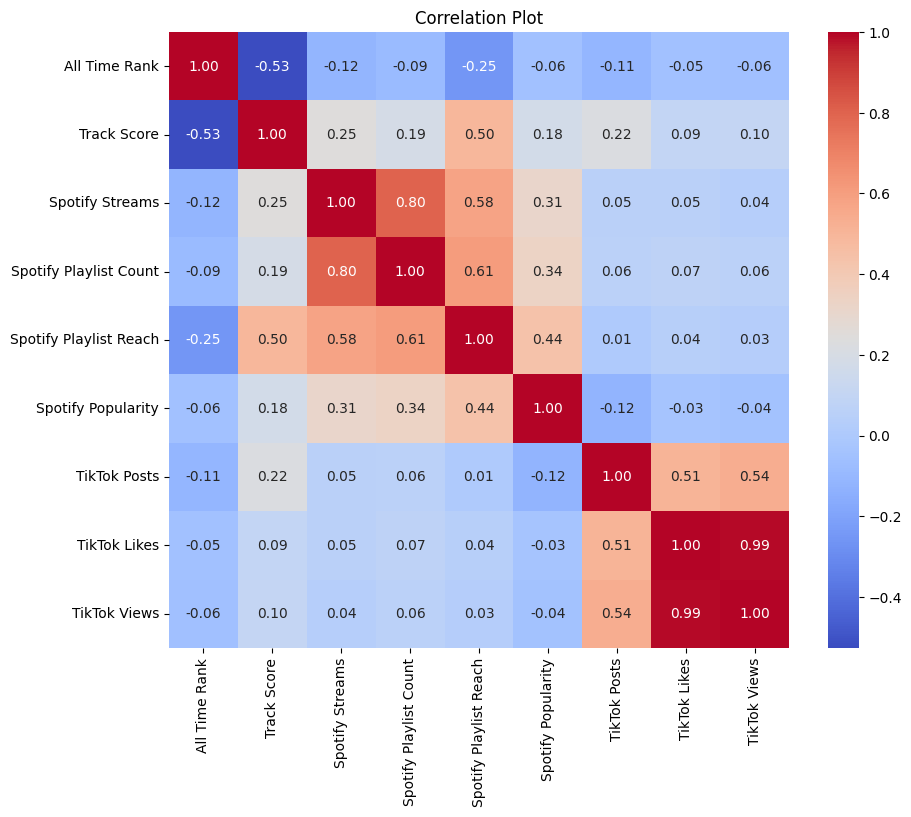

In [135]:
plt.figure(figsize=(10, 8))
sns.heatmap(spotify_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [136]:
print(df.dtypes)

Track                          object
Album Name                     object
Artist                         object
All Time Rank                 float64
Track Score                   float64
Spotify Streams               float64
Spotify Playlist Count        float64
Spotify Playlist Reach        float64
Spotify Popularity            float64
YouTube Views                 float64
YouTube Likes                 float64
TikTok Posts                  float64
TikTok Likes                  float64
TikTok Views                  float64
YouTube Playlist Reach        float64
Apple Music Playlist Count    float64
dtype: object


In [137]:
#creating a separate DataFrame with song names and artist names for reference.
#can use this reference DataFrame to map predictions back to original songs and artists if needed
reference_df = df[['Track', 'Artist', 'Album Name']]

Drop columns not to be used in feature selection or target variable

In [138]:
df = df.drop(columns=reference_df.columns)

In [139]:
print(df.columns)

Index(['All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count'],
      dtype='object')


Defining the target variable and dropping it from the dataframe.

In [140]:
y = df['Track Score'].values
df = df.drop(columns=['Track Score'], axis=1)

In [141]:
df

,All Time Rank,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count
0,1.0,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,210.0
1,2.0,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,188.0
2,3.0,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,190.0
3,4.0,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,394.0
4,5.0,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,2.653441e+07,2.659172e+08,1.127639e+08,182.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,499.5,3.050500e+08,65770.0,5103054.0,71.0,1.492477e+08,1397590.0,48370.0,2.020200e+07,1.439344e+08,5.301600e+04,3.0
4596,499.5,5.228236e+07,4602.0,1449767.0,56.0,9.439202e+08,5347766.0,182200.0,1.721000e+03,1.993500e+04,2.497305e+07,1.0
4597,499.5,1.899727e+08,72066.0,6704802.0,65.0,2.010273e+08,1081402.0,7596.0,5.288677e+06,3.684900e+07,2.925315e+07,19.0
4598,499.5,1.454670e+08,14037.0,7387064.0,66.0,1.118595e+09,3868828.0,11433.0,2.534831e+06,3.775730e+07,2.515052e+07,1.0


Dropping columns not used in the correlation matrix, that are not used in feature selection or as the label.

In [142]:
df = df.drop(['Apple Music Playlist Count', 'YouTube Playlist Reach', 'YouTube Views', 'YouTube Likes'], axis=1)

In [143]:
df

,All Time Rank,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,TikTok Posts,TikTok Likes,TikTok Views
0,1.0,3.904709e+08,30716.0,196631588.0,92.0,5767700.0,6.515659e+08,5.332282e+09
1,2.0,3.237039e+08,28113.0,174597137.0,92.0,674700.0,3.522355e+07,2.083390e+08
2,3.0,6.013093e+08,54331.0,211607669.0,92.0,3025400.0,2.751542e+08,3.369121e+09
3,4.0,2.031281e+09,269802.0,136569078.0,85.0,7189811.0,1.078758e+09,1.460373e+10
4,5.0,1.070349e+08,7223.0,151469874.0,88.0,16400.0,2.653441e+07,2.659172e+08
...,...,...,...,...,...,...,...,...
4595,499.5,3.050500e+08,65770.0,5103054.0,71.0,48370.0,2.020200e+07,1.439344e+08
4596,499.5,5.228236e+07,4602.0,1449767.0,56.0,182200.0,1.721000e+03,1.993500e+04
4597,499.5,1.899727e+08,72066.0,6704802.0,65.0,7596.0,5.288677e+06,3.684900e+07
4598,499.5,1.454670e+08,14037.0,7387064.0,66.0,11433.0,2.534831e+06,3.775730e+07


Assign the features to x

In [144]:
X = df.values
#attaches underlying numpy array of values from businesses
#dataframe to X - .values converts the df to an array

In [145]:
X

array([[1.00000000e+00, 3.90470936e+08, 3.07160000e+04, ...,
        5.76770000e+06, 6.51565900e+08, 5.33228194e+09],
       [2.00000000e+00, 3.23703884e+08, 2.81130000e+04, ...,
        6.74700000e+05, 3.52235470e+07, 2.08339025e+08],
       [3.00000000e+00, 6.01309283e+08, 5.43310000e+04, ...,
        3.02540000e+06, 2.75154237e+08, 3.36912061e+09],
       ...,
       [4.99500000e+02, 1.89972685e+08, 7.20660000e+04, ...,
        7.59600000e+03, 5.28867700e+06, 3.68490050e+07],
       [4.99500000e+02, 1.45467020e+08, 1.40370000e+04, ...,
        1.14330000e+04, 2.53483100e+06, 3.77573010e+07],
       [4.99500000e+02, 2.55740653e+08, 3.21380000e+04, ...,
        7.80000000e+04, 1.00554610e+07, 7.01963880e+07]])

In [146]:
y

array([725.4, 545.9, 538.4, ...,  19.4,  19.4,  19.4])

Split the dataset

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)


Standardize the data

In [148]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Build and Train the Linear Regression Model

In [149]:
model = LinearRegression()
#training the model
model.fit(X_train_scaled, y_train)

LinearRegression()

Make Predictions

In [150]:
y_pred = model.predict(X_test_scaled)

Evaluation Metrics

In [151]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test,y_pred)

print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


R2: 0.4929245527202353
MSE: 826.67667315783
RMSE: 28.751985551572435
MAE: 17.72676646377442
